In [1]:
%matplotlib inline


Simple visualization and classification of the digits dataset
=============================================================

Plot the first few samples of the digits dataset and a 2D representation
built using PCA, then do a simple classification



In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [13]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

Plot the data: images of digits
-------------------------------

Each data in a 8x8 image



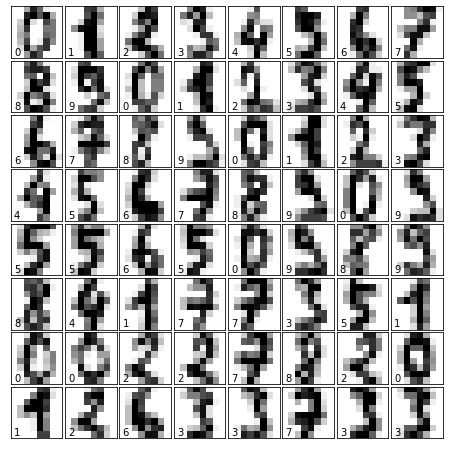

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Plot a projection on the 2 first principal axis
------------------------------------------------



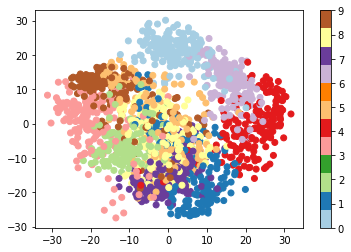

In [4]:
plt.figure()

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired")
plt.colorbar()

Classify with Gaussian naive Bayes
----------------------------------



In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit([X_train,X_test], [y_train,y_test])

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

D:\ENV4VS\anaconda\lib\site-packages\sklearn\utils\validation.py:1023: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.asarray(y)


AttributeError: 'bool' object has no attribute 'any'

Quantify the performance
------------------------

First print the number of correct matches



In [6]:
matches = (predicted == expected)
print(matches.sum())

378


The total number of data points



In [7]:
print(len(matches))

450


And now, the ration of correct predictions



In [8]:
matches.sum() / float(len(matches))

0.84

Print the classification report



In [9]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.77      0.86      0.81        43
           2       0.93      0.62      0.75        45
           3       0.89      0.85      0.87        46
           4       1.00      0.83      0.91        53
           5       0.87      0.90      0.89        52
           6       0.98      1.00      0.99        49
           7       0.63      0.95      0.76        38
           8       0.60      0.87      0.71        38
           9       0.94      0.59      0.72        49

    accuracy                           0.84       450
   macro avg       0.86      0.84      0.84       450
weighted avg       0.87      0.84      0.84       450



Print the confusion matrix



In [10]:
print(metrics.confusion_matrix(expected, predicted))

plt.show()

[[36  0  0  0  0  0  0  1  0  0]
 [ 0 37  1  0  0  0  0  2  3  0]
 [ 0  7 28  0  0  0  0  0 10  0]
 [ 0  0  1 39  0  2  0  1  2  1]
 [ 0  0  0  0 44  1  1  7  0  0]
 [ 0  0  0  2  0 47  0  1  1  1]
 [ 0  0  0  0  0  0 49  0  0  0]
 [ 0  0  0  0  0  1  0 36  1  0]
 [ 0  2  0  0  0  0  0  3 33  0]
 [ 1  2  0  3  0  3  0  6  5 29]]
